# se2dr Poster half figure 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('science')

import os, sys, time


sys.path.insert(0,"/home/nico/Tools/petsc-3.12.5/lib/petsc/bin/")
sys.path.insert(0,"/home/nico/Documents/TEAR/Codes_TEAR/se2dr/se2wave/utils/python/")
sys.path.insert(0,"/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/LibFolder")
from se2waveload import *
from Lib_GeneralFunctions import *
from GeneratePaperFigs import *
from ModelIllustration import *

In [2]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16
FontSizeControlFreak(SMALL_SIZE,MEDIUM_SIZE,BIGGER_SIZE)

In [3]:
xx = np.linspace(-1.e4, 1.e4, 6001)

HorizontalZeroSDF = ZeroLevelSet(xx,Tiltfunc(xx, theta = 0), Tiltfunc_der(xx, theta = 0), "Horizontal SDF")
TiltedZeroSDF     = ZeroLevelSet(xx,Tiltfunc(xx, theta = 20*np.pi/180), Tiltfunc_der(xx, theta = 20*np.pi/180), "Tilted 20deg SDF")
SigmZeroSDF       = ZeroLevelSet(xx,func(xx),func_der(xx), "Sigmoid SDF")


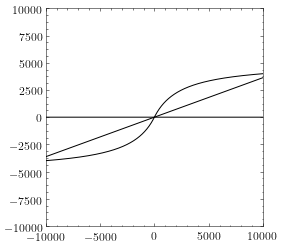

In [4]:
HorizontalZeroSDF.PlotZeroLevelSet()
TiltedZeroSDF.PlotZeroLevelSet()
SigmZeroSDF.PlotZeroLevelSet()

plt.xlim([-10000,10000])
plt.ylim([-10000,10000])
plt.gca().set_aspect('equal', adjustable='box')

# Colormap selection

In [5]:
from palettable.colorbrewer.diverging import PuOr_10_r as FieldColor

cmap = FieldColor.mpl_colormap

from matplotlib.colors import ListedColormap
import matplotlib.lines as mlines
from palettable.cartocolors.qualitative import Safe_5 as LineColor

cmapProf = ListedColormap(LineColor.mpl_colors[:])

# Extract the information for the profiles

## First the reference

In [6]:
path = "/home/nico/Documents/TEAR/Codes_TEAR/ProfilePicking/Output/"
# Reference saved into a list of objects
RefList = [SSCreference(path + "Reference/sem2dpack/sem2d-{}-0.txt", "0km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-1.txt", "2km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-2.txt", "4km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-3.txt", "6km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-4.txt", "8km"),
          ]

pathTPV = "/home/nico/Documents/TEAR/Codes_TEAR/ProfilePicking/[TPV3]Results/"

# Reference saved into a list of objects

RefListTPV =  [TPV3reference(pathTPV + "Reference/sem2dpack/[TPV3]sem2dpack-{}-receiver-0.0e+00.txt", "0km"),
               TPV3reference(pathTPV + "Reference/sem2dpack/[TPV3]sem2dpack-{}-receiver-2.0e+03.txt", "2km"),
               TPV3reference(pathTPV + "Reference/sem2dpack/[TPV3]sem2dpack-{}-receiver-4.0e+03.txt", "4km"),
               TPV3reference(pathTPV + "Reference/sem2dpack/[TPV3]sem2dpack-{}-receiver-6.0e+03.txt", "6km"),
               TPV3reference(pathTPV + "Reference/sem2dpack/[TPV3]sem2dpack-{}-receiver-8.0e+03.txt", "8km"),
              ]


# Now select the time snapshot of interest

In [7]:
start_time = time.time()
fname = "step-{timestep:04}_wavefield.pbin"
path = "/home/nico/LRZ Sync+Share/SharedWolfel/PaperData/Kos_T0_P3_25x25_1/"


i=8180
FieldFilename = os.path.join(path,fname.format(timestep=i))

MeshFilename = os.path.join(path, "default_mesh_coor.pbin")
se2_coor = se2wave_load_coordinates(MeshFilename)

In [8]:
FileList = glob(os.path.join(path,"step-{timestep}_wavefield.pbin".format(timestep="*")))
l = [i.replace(os.path.join(path,'step-'),'').replace('_wavefield.pbin','') for i in FileList]
l

['8180']

# Extract the fields for velocity and displacement in each component

In [9]:
TimeStepVal, LCoorX, LCoorY, LFieldX, LFieldY, LFieldvelX, LFieldvelY =  ExtractFields(FieldFilename, se2_coor)

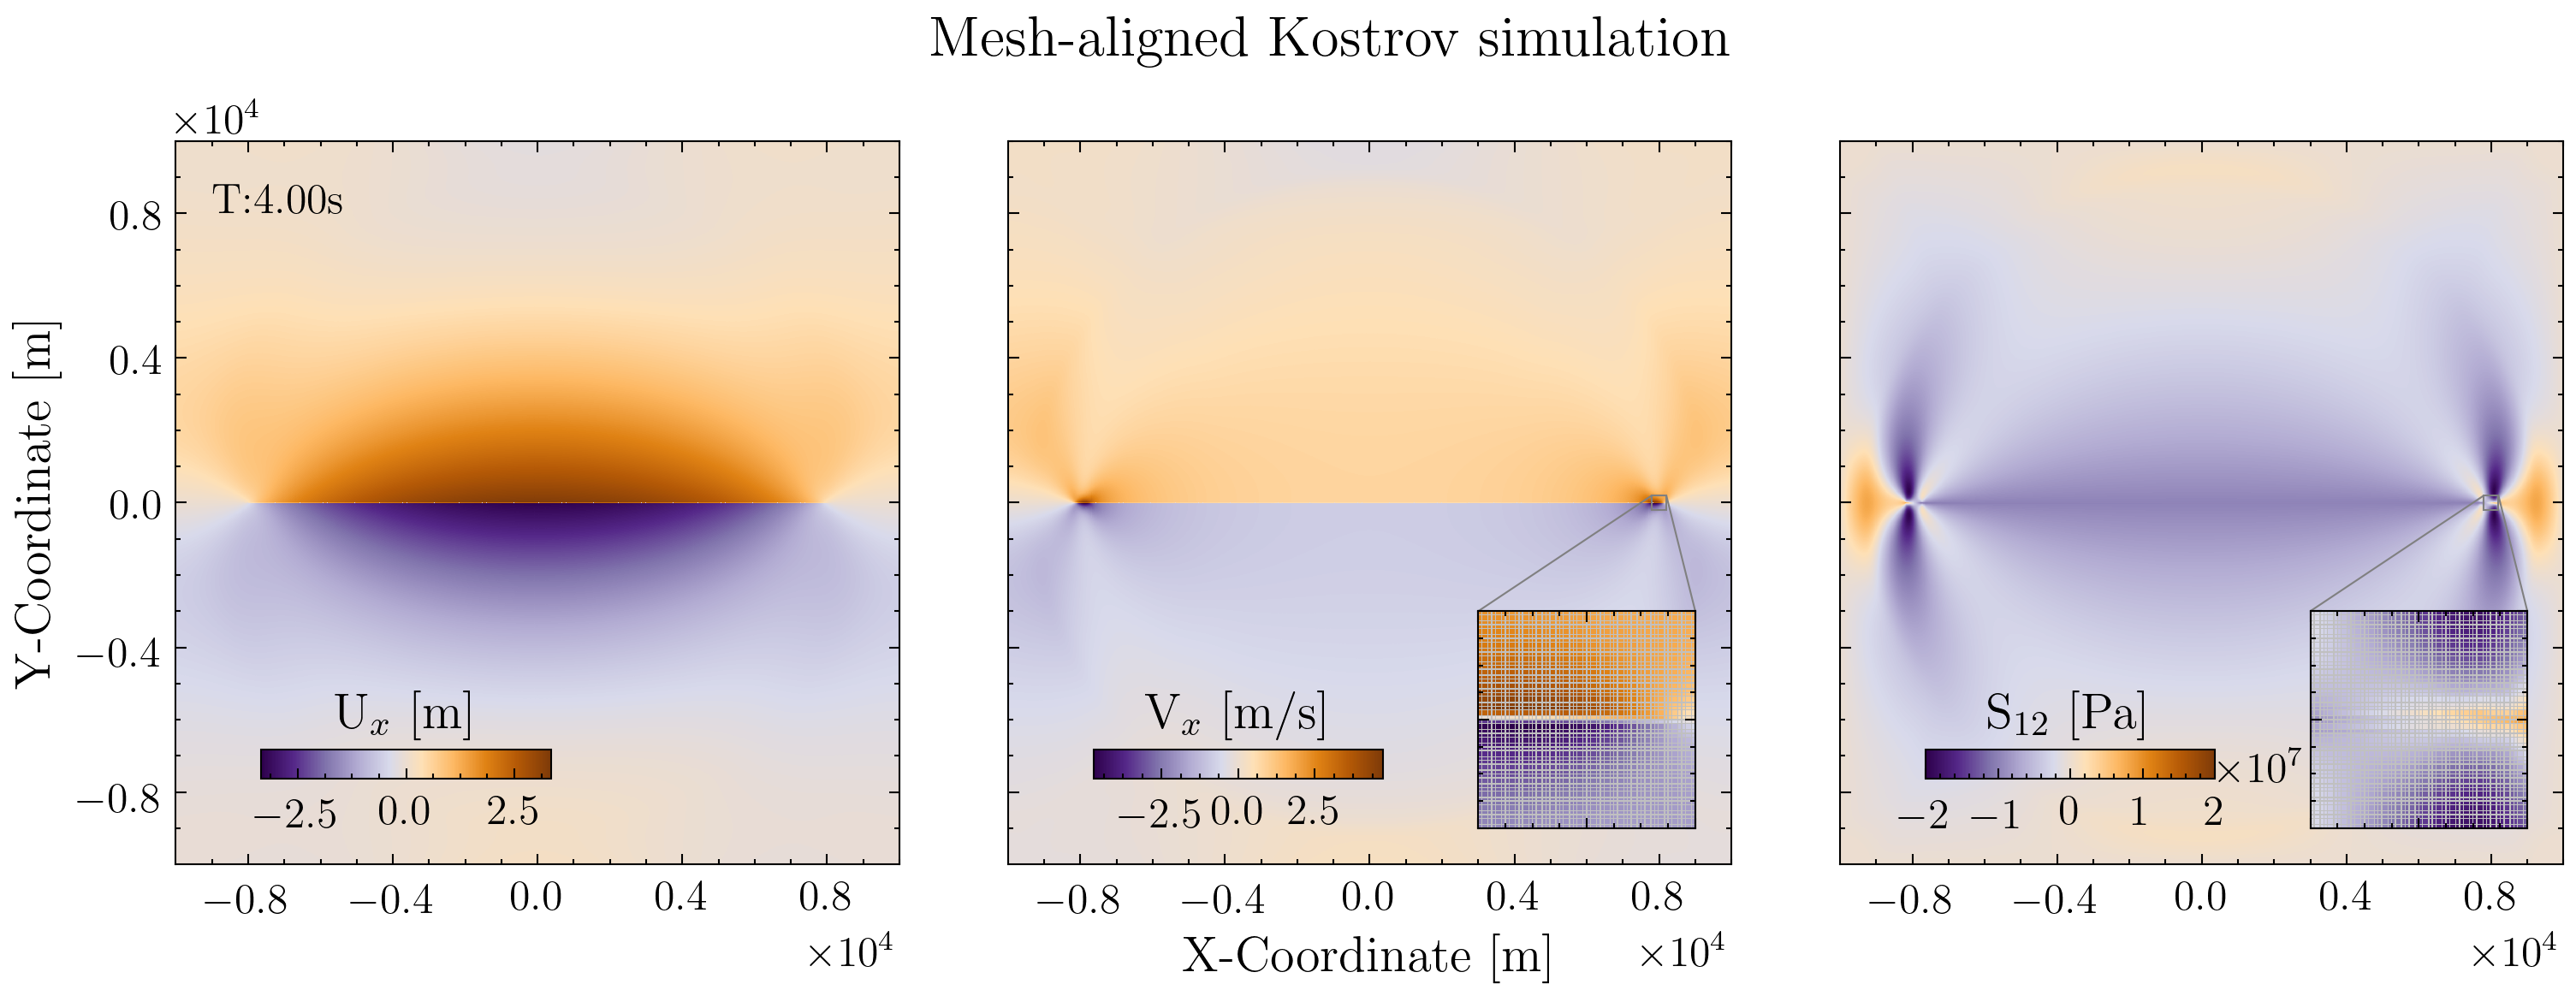

In [10]:
FolderTiltedPath = "/home/nico/LRZ Sync+Share/SharedWolfel/Works/se2dr_Paper/DataToPlot/NewBatch-20211015/"
ZeroTiltp3h25 = LoadPickleFile(Filename = "Fin_Kos_T0_P3_025x025_d1_tanh12ph65-Tilt0.0-P3-TPList_t8170_d25.pickle",FolderPath = FolderTiltedPath)
StressFromPickle = LoadPickleFile("/home/nico/LRZ Sync+Share/SharedWolfel/PaperData/Kos_T0_P3_25x25_1/Out/", "StressInAPickle")

F1, ax = PlotHalfSetup(LCoorX, LCoorY, LFieldX, LFieldvelX, StressFromPickle, 
           ["X-Component Displacement ", "X-Component Displacement [m]"],
           TimeStepVal,[8000-200,8000+200,-200,200],
            cmap=cmap)
F1.suptitle("Mesh-aligned Kostrov simulation")
F1.patch.set_facecolor('white')

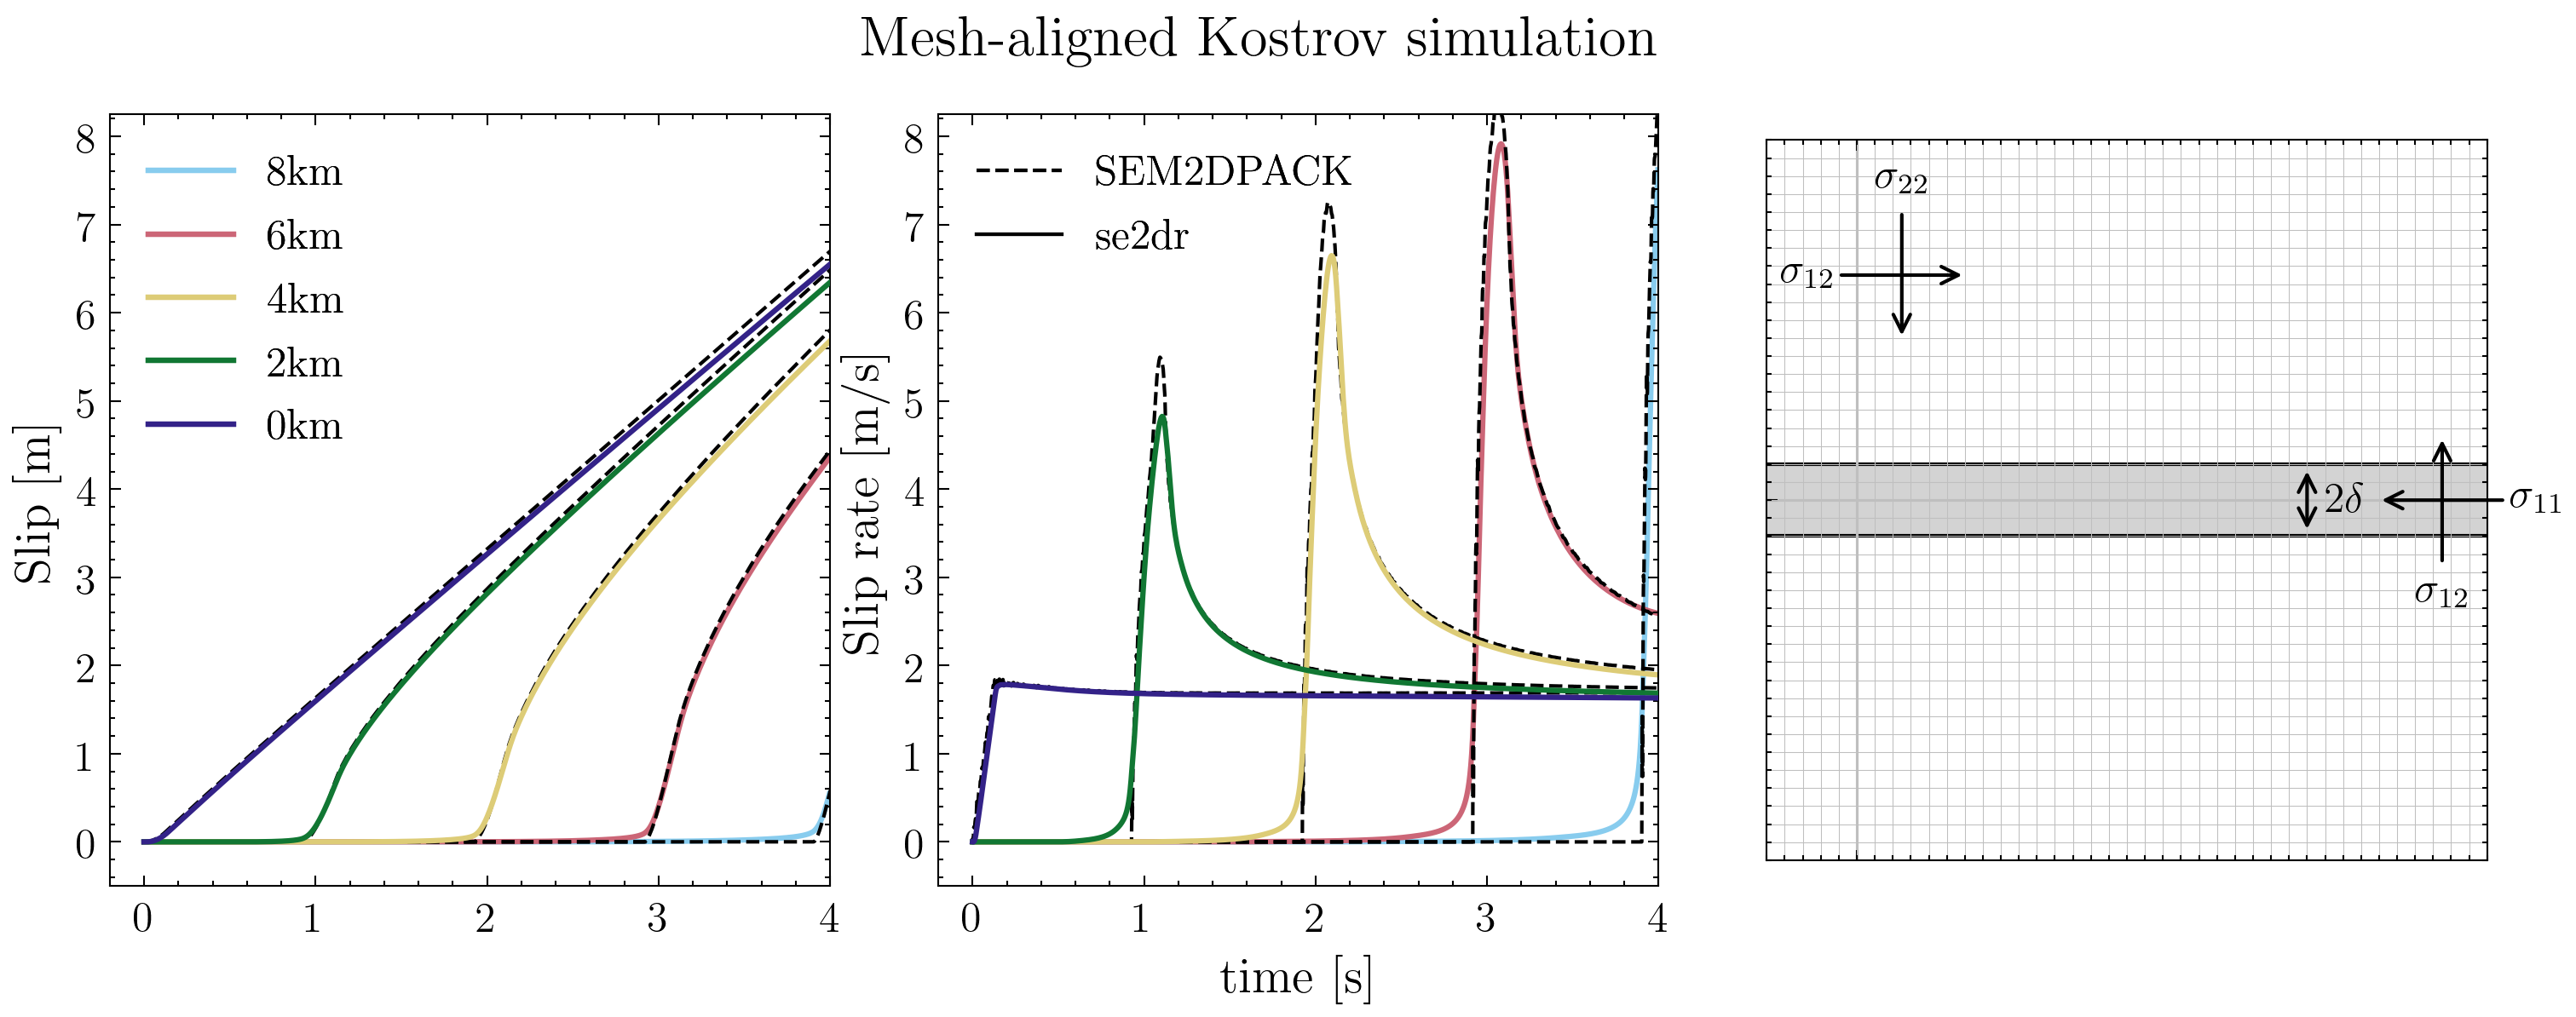

In [11]:
fig = plt.figure(figsize = (12, 4),dpi=300) #constrained_layout=True
gs = fig.add_gridspec(1, 3, wspace=0.15,hspace=0.2)


ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

ax = [ax1,ax2,ax3]
# Tilted case plotting
iidx = 0
for iidx,Test1 in enumerate(ZeroTiltp3h25):
    ax[0].plot(Test1.Time, Test1.DispX, color= cmapProf.colors[iidx], linewidth=1.5, zorder=iidx)
    ax[1].plot(Test1.Time, Test1.VelX,  color= cmapProf.colors[iidx], linewidth=1.5, zorder=iidx) 

LabelsPerColor= ["25x25 - P3 - $\delta$50."]

fig.suptitle("Mesh-aligned Kostrov simulation")
[item.PlotReference(ax[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(ax[1], "SlipRate", filtering=False) for item in RefList]

formatGivenAxes(ax[:2],inverted=True)

GenKostrovCase(ax[2])
fig.patch.set_facecolor('white')

In [12]:
ZeroTiltp3h25[-1].VelX

[0.0,
 -0.001563882994269944,
 0.008698311367250303,
 0.034483262672018594,
 0.0826077788409634,
 0.1455703451136494,
 0.21226959387668154,
 0.27712500482512215,
 0.34181753086913635,
 0.4089871083132884,
 0.4781655036064837,
 0.5479758089584515,
 0.617538291678849,
 0.6864797084245644,
 0.755507860409242,
 0.8251410680752815,
 0.8951752892966127,
 0.9651722695770744,
 1.0350739889012541,
 1.1049121339551595,
 1.17477991749362,
 1.244840276200942,
 1.3150471605153555,
 1.3852178081930138,
 1.455325535095724,
 1.525462110703479,
 1.596212770293946,
 1.6669035579363798,
 1.7234334870058703,
 1.751833382965119,
 1.763786682822443,
 1.76935403350075,
 1.7758917645401806,
 1.7795809846169472,
 1.781519755111066,
 1.7820399804443785,
 1.7828851691549459,
 1.7837402900028474,
 1.7842554667265276,
 1.7843504092772249,
 1.7841057910072762,
 1.783757934073944,
 1.7833402871176398,
 1.7829815774374111,
 1.7826075706072841,
 1.7821502853063635,
 1.7815548563238055,
 1.7808613698437101,
 1.78012098